In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import CM4Xutils
CM4Xutils.__version__

'0.3.0'

In [3]:
import warnings
import dask
import xarray as xr
import matplotlib.pyplot as plt

import doralite
import gfdl_utils.core as gu

In [4]:
import sys
sys.path.insert(1, '../scipts')
from scripts.remap_functions import remap_budgets_to_sigma2_and_coarsen

In [9]:
doralite.dora_metadata("odiv-209")

{'displayName': None,
 'expLabels': None,
 'expLength': None,
 'expMIP': None,
 'expName': 'CM4_piControl_c192_OM4p125_v7',
 'expType': 'piControl',
 'expYear': None,
 'gfdlHistoryYear': None,
 'id': 1767,
 'jobID': None,
 'master_id': 1767,
 'modelType': 'CM4',
 'owner': 'Raphael.Dussin',
 'pathAnalysis': '/nbhome/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p125_v7/',
 'pathDB': '/home/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p125_v7/gfdl.ncrc4-intel18-prod-openmp/db/',
 'pathLog': None,
 'pathPP': '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p125_v7/gfdl.ncrc4-intel18-prod-openmp/pp/',
 'pathScript': '/lustre/f2/dev/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p125_v7/ncrc4.intel18-prod-openmp/scripts/CM4_piControl_c192_OM4p125_v7/',
 'pathXML': '/home/Raphael.Dussin/ncrc/RUNS/xml/CM4_piControl_c192_OM4p125_v7.xml/',
 'queue': None,
 'refresh': None,
 'requested_id': 'odiv-209',

In [5]:
grid = CM4Xutils.load_wmt_grid(
    "CM4Xp125",
    interval=str(1850),
    dmget=True
)
display(grid._ds)

Loading CM4Xp125-piControl for interval `1850`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Skipping average_DT because independent of 'X' and 'Y' dims.
Skipping average_T1 because independent of 'X' and 'Y' dims.
Skipping average_T2 because independent of 'X' and 'Y' dims.
Skipping time_bnds because independent of 'X' and 'Y' dims.
Skipping taux because cell method is mean in yh.
Skipping tauy because cell method is mean in xh.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Loading CM4Xp125-historical for interval `1850`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Skipping average_DT because independent of 'X' and 'Y' dims.
Skipping average_T1 because inde

/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xarray/core/indexing.py:1617: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xarray/core/indexing.py:1617: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Overriding CM4Xp125 grid coordinates from supergrid.
Regridding ice
Skipping average_DT because independent of 'X' and 'Y' dims.
Skipping average_T1 because independent of 'X' and 'Y' dims.
Skipping average_T2 because independent of 'X' and 'Y' dims.
Skipping time_bnds because independent of 'X' and 'Y' dims.
Inferring Z grid coordinate: depth `z_`


<xarray.Dataset> Size: 1TB
Dimensions:                         (exp: 2, time: 60, z_l: 35, yh: 1120,
                                     xh: 1440, nv: 2, z_i: 36, xq: 1441,
                                     yq: 1121, time_bounds: 61)
Coordinates: (12/29)
  * exp                             (exp) object 16B 'forced' 'control'
  * nv                              (nv) float64 16B 1.0 2.0
  * z_i                             (z_i) float64 288B 0.0 5.0 ... 6.75e+03
  * z_l                             (z_l) float64 280B 2.5 10.0 ... 6.5e+03
    geolon                          (yh, xh) float64 13MB -298.5 -298.3 ... 60.0
    lon                             (yh, xh) float64 13MB -298.5 -298.3 ... 60.0
    ...                              ...
    time_since_init                 (time) object 480B 0101-01-16 12:00:00 .....
    time_bounds_since_init          (time_bounds) object 488B 0101-01-01 00:0...
  * xh                              (xh) int64 12kB 0 1 2 3 ... 1437 1438 1439
  * yh                              (yh) int64 9kB 0 1 2 3 ... 1117 1118 1119
  * xq                              (xq) int64 12kB 0 1 2 3 ... 1438 1439 1440
  * yq                              (yq) int64 9kB 0 1 2 3 ... 1118 1119 1120
Data variables: (12/63)
    S_advection_xy                  (exp, time, z_l, yh, xh) float32 27GB dask.array<chunksize=(1, 1, 35, 1120, 1440), meta=np.ndarray>
    average_DT                      (exp, time) timedelta64[ns] 960B dask.array<chunksize=(1, 1), meta=np.ndarray>
    average_T1                      (exp, time) object 960B dask.array<chunksize=(1, 1), meta=np.ndarray>
    average_T2                      (exp, time) object 960B dask.array<chunksize=(1, 1), meta=np.ndarray>
    time_bnds                       (exp, time, nv) object 2kB dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    Sh_tendency_vert_remap          (exp, time, z_l, yh, xh) float32 27GB dask.array<chunksize=(1, 1, 35, 1120, 1440), meta=np.ndarray>
    ...                              ...
    RAIN                            (exp, time, yh, xh) float32 774MB dask.array<chunksize=(1, 1, 373, 480), meta=np.ndarray>
    SNOWFL                          (exp, time, yh, xh) float32 774MB dask.array<chunksize=(1, 1, 373, 480), meta=np.ndarray>
    siconc                          (exp, time, yh, xh) float32 774MB dask.array<chunksize=(1, 1, 373, 480), meta=np.ndarray>
    sithick                         (exp, time, yh, xh) float32 774MB dask.array<chunksize=(1, 1, 373, 480), meta=np.ndarray>
    sigma2                          (exp, time, z_l, yh, xh) float64 54GB dask.array<chunksize=(1, 1, 35, 1120, 1440), meta=np.ndarray>
    sigma2_bounds                   (exp, z_l, yh, xh, time_bounds) float64 55GB dask.array<chunksize=(1, 35, 1120, 1440, 1), meta=np.ndarray>
Attributes:
    filename:            ocean_monthly_z_d2.185001-185412.S_advection_xy.nc
    title:               CM4_historical_c192_OM4p125
    grid_type:           regular
    grid_tile:           N/A
    associated_files:    areacello: 18500101.D2ocean_static.nc
    history:             Fri Jun  9 01:32:07 2023: ncatted -O -a associated_f...
    NCO:                 netCDF Operators version 5.0.1 (Homepage = http://nc...
    external_variables:  volcello
    model:               CM4Xp125
    description:         The CM4Xp125 experimental design following Griffies ...

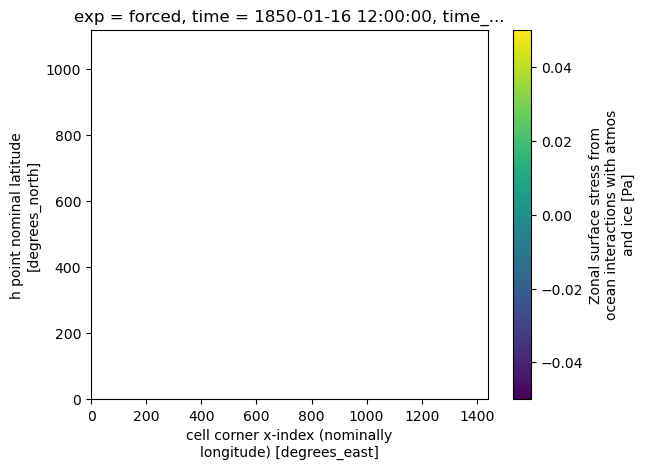

In [7]:
grid._ds["taux"].isel(time=0, exp=0).plot()

In [ ]:
grid.